# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
def parser(s):
    return pd.to_datetime(s, format='%d/%m/%Y %H:%M:%S.%f')

In [ ]:
#Noise Events
eve_01 = pd.read_csv("export_41/csv_results_41_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)

In [ ]:
#Noise level data
nl_01_01 = pd.read_csv("export_42/csv_results_42_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_02 = pd.read_csv("export_42/csv_results_43_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_03 = pd.read_csv("export_42/csv_results_44_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_04 = pd.read_csv("export_42/csv_results_45_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_05 = pd.read_csv("export_42/csv_results_46_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_06 = pd.read_csv("export_42/csv_results_47_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_07 = pd.read_csv("export_42/csv_results_48_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_08 = pd.read_csv("export_42/csv_results_49_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_09 = pd.read_csv("export_42/csv_results_50_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_10 = pd.read_csv("export_42/csv_results_51_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_11 = pd.read_csv("export_42/csv_results_52_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)
nl_01_12 = pd.read_csv("export_42/csv_results_53_255439_mp-01-naamsestraat-35-maxim.csv",sep=';', parse_dates=['result_timestamp'], date_parser=parser)

In [ ]:
#Meteo Data
LC_01 = pd.read_csv("dataverse_files/LC_2022Q1.csv")
LC_02 = pd.read_csv("dataverse_files/LC_2022Q2.csv")
LC_03 = pd.read_csv("dataverse_files/LC_2022Q3.csv")
LC_04 = pd.read_csv("dataverse_files/LC_2022Q4.csv")
Meta = pd.read_csv("dataverse_files/01_Metadata_v2.csv")

# Merge

In [ ]:
nl_01 = pd.concat([nl_01_01, nl_01_02, nl_01_03, nl_01_04, nl_01_05, nl_01_06,
                   nl_01_07, nl_01_08, nl_01_09, nl_01_10, nl_01_11, nl_01_12], axis=0)

In [ ]:
eve_01['result_timestamp_second'] = eve_01['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y %H:%M:%S'))
nl_01['result_timestamp_second'] = nl_01['result_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%d/%m/%Y %H:%M:%S'))

In [ ]:
eve_nl_01 = pd.merge(eve_01, nl_01, on=['result_timestamp_second'], how='inner')

# Plot

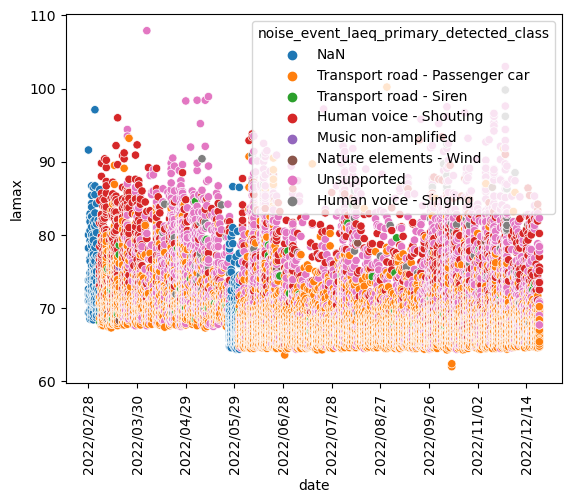

In [60]:
# fig, ax = plt.subplots()
# df=eve_nl_01

# df['noise_event_laeq_primary_detected_class'] = df['noise_event_laeq_primary_detected_class'].fillna('NaN')
# df['date'] = df['result_timestamp_x'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m/%d'))
# #df=df[df['noise_event_laeq_primary_detected_class']=='Human voice - Shouting']
# sns.scatterplot(x='date', y='lamax', hue='noise_event_laeq_primary_detected_class', data=df)

# x_ticks = ax.get_xticks()
# ax.set_xticks(x_ticks[::30])
# plt.xticks(rotation=90)
# plt.show()

# Matrix for regression model

Event data every 3 hours

In [ ]:

date_rng = pd.date_range(start='2022-03-08', end='2022-12-22', freq='3H')
df_01 = pd.DataFrame(date_rng, columns=['date'])
df_01 = df_01.drop(df_01.index[-1])

df_01['date'] = pd.to_datetime(df_01['date'])
df_01['day'] = df_01['date'].dt.date
df_01['time'] = df_01['date'].dt.time.apply(lambda x: f"{x.hour:02d}:00-{x.hour+3:02d}:00")
df_01["weekday"] = df_01["date"].dt.day_name()


In [ ]:
df_01["noise_event"] = 0
df_01["Human voice - Shouting"] = 0
df_01["Human voice - Singing"] = 0
df_01["Transport road - Passenger car"] = 0
df_01["Transport road - Siren"] = 0
df_01["Music non-amplified"] = 0
df_01["Nature elements - Wind"] = 0
df_01["Unsupported"] = 0
df_01["NaN"] = 0

In [ ]:
for i, row1 in eve_nl_01.iterrows():
    eve_date_time = dt.datetime.strptime(row1['result_timestamp_second'], '%d/%m/%Y %H:%M:%S')
    for j, row2 in df_01.iterrows():
        if (row2['date']<=eve_date_time)&(eve_date_time<(row2['date']+ dt.timedelta(hours=3))):
            df_01.loc[j,"noise_event"]+=1
            df_01.loc[j,row1['noise_event_laeq_primary_detected_class']]+=1
    

MeteoData

In [ ]:
LC_117_01=LC_01[LC_01["ID"]=="LC-117"]
LC_117_02=LC_02[LC_02["ID"]=="LC-117"]
LC_117_03=LC_03[LC_03["ID"]=="LC-117"]
LC_117_04=LC_04[LC_04["ID"]=="LC-117"]
LC_117 = pd.concat([LC_117_01,LC_117_02,LC_117_03,LC_117_04], axis=0)
LC_117 = LC_117.reset_index(drop=True)


In [ ]:
date_rng = pd.date_range(start='2022-03-08', end='2022-12-22', freq='3H')
meteo = pd.DataFrame(date_rng, columns=['date'])
meteo = meteo.drop(meteo.index[-1])
meteo['date'] = pd.to_datetime(meteo['date'])


In [ ]:
for i, row1 in meteo.iterrows():
    LC_DWPTEMP_list = []
    LC_RAININ_list = [] 
    for j, row2 in LC_117.iterrows():
        lc_date_time = dt.datetime.strptime(row2['DATEUTC'], '%Y-%m-%d %H:%M:%S')
        if (row1['date']<=lc_date_time)&(lc_date_time<(row1['date']+ dt.timedelta(hours=3))):
            LC_DWPTEMP_list.append(row2['LC_DWPTEMP'])
            LC_RAININ_list.append(row2['LC_RAININ'])
    if len(LC_DWPTEMP_list) == 0:
        meteo.loc[i,'LC_DWPTEMP'] = 0
    else:
        meteo.loc[i,'LC_DWPTEMP'] = sum(LC_DWPTEMP_list)/len(LC_DWPTEMP_list)
    if len(LC_RAININ_list) == 0:
        meteo.loc[i,'LC_RAININ'] = 0
    else:
        meteo.loc[i,'LC_RAININ'] = sum(LC_RAININ_list)/len(LC_RAININ_list)

Merge Event data every 3 hours + meteo data

In [ ]:
meteo = pd.read_csv('meteo.csv',index_col=0)
df_01 = pd.read_csv('df_01.csv',index_col=0)

In [ ]:
DF_01 = df_01.merge(meteo, on='date',left_index=False, right_index=False)

In [ ]:
DF_01

Some of categorical values to numerical

In [ ]:
df_01["Thursday"] = (df_01["weekday"] == "Thursday").astype(int)
df_01["Friday"] = (df_01["weekday"] == "Friday").astype(int)
df_01["Saturday"] = (df_01["weekday"] == "Saturday").astype(int)
df_01["21:00-03:00"] = ((df_01["time"] == "21:00-00:00")|(df_01["time"] == "00:00-03:00")).astype(int)

In [61]:
df_01

,date,day,time,weekday,noise_event,Human voice - Shouting,Human voice - Singing,Transport road - Passenger car,Transport road - Siren,Music non-amplified,Nature elements - Wind,Unsupported,NaN,Thursday,Friday,Saturday,21:00-03:00
0,2022-03-08 00:00:00,2022-03-08,00:00-03:00,Tuesday,19,18,0,0,1,0,0,0,0,0,0,0,1
1,2022-03-08 03:00:00,2022-03-08,03:00-06:00,Tuesday,6,6,0,0,0,0,0,0,0,0,0,0,0
2,2022-03-08 06:00:00,2022-03-08,06:00-09:00,Tuesday,14,7,0,6,0,1,0,0,0,0,0,0,0
3,2022-03-08 09:00:00,2022-03-08,09:00-12:00,Tuesday,8,0,0,7,1,0,0,0,0,0,0,0,0
4,2022-03-08 12:00:00,2022-03-08,12:00-15:00,Tuesday,5,4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,2022-12-21 09:00:00,2022-12-21,09:00-12:00,Wednesday,13,1,0,8,0,0,0,4,0,0,0,0,0
2308,2022-12-21 12:00:00,2022-12-21,12:00-15:00,Wednesday,8,0,0,7,0,0,0,1,0,0,0,0,0
2309,2022-12-21 15:00:00,2022-12-21,15:00-18:00,Wednesday,17,0,0,15,0,0,0,2,0,0,0,0,0
2310,2022-12-21 18:00:00,2022-12-21,18:00-21:00,Wednesday,10,1,0,7,0,0,0,2,0,0,0,0,0


In [ ]:
#df_01.to_csv('df_01.csv')